<a href="https://colab.research.google.com/github/arkeodev/demistify_deep_learning_applications/blob/main/YOLO_Object_Detection_From_Theory_to_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO Object Detection: From Theory to Implementation

Object detection is a crucial task in computer vision that involves identifying and localizing objects within an image. Among the numerous approaches to object detection, YOLO (You Only Look Once) has emerged as one of the most effective and efficient methods. In this blog post, we delve into the fundamentals of YOLO object detection, its implementation, and the implementation in PyTorch, with a focus on practical application using the COCO dataset.

## Understanding YOLO Object Detection

Understanding the core concepts behind YOLO (You Only Look Once) object detection is essential for mastering how it revolutionizes object detection tasks, particularly in terms of speed and accuracy. Let's delve deeper into the intricacies of YOLO, the concept of bounding boxes, and the crucial metric of Intersection Over Union (IoU).

### Deep Dive into YOLO Object Detection

YOLO fundamentally changes the object detection landscape by treating the task as a single regression problem from image pixels to bounding box coordinates and class probabilities. This approach contrasts sharply with traditional methods, which typically involve a two-step process: first proposing candidate regions (region proposals) and then classifying each region into various categories.

#### How YOLO Works:

1. **Single Convolutional Network:** YOLO uses a single convolutional network to predict multiple bounding boxes and class probabilities for those boxes simultaneously. This end-to-end training and prediction model dramatically increases the speed of detection.

2. **Spatial Division of Images:** The image is divided into an $(S×S$) grid, and for each grid cell, YOLO predicts $(B$) bounding boxes and confidence scores for those boxes. Confidence reflects the accuracy of the bounding box and the probability that the box contains a specific object.

3. **Class Probabilities:** Alongside bounding box predictions, YOLO also predicts class probabilities for each grid cell, irrespective of the number of boxes $(B$).

#### Advantages:

**Speed:** By simplifying the detection into a single network forward pass, YOLO achieves remarkable speed, making it suitable for real-time applications.

**Global Context:** Unlike region proposal-based methods, YOLO sees the entire image during training and test time, allowing it to implicitly encode contextual information about classes.

### The Concept of Bounding Boxes

Bounding boxes are pivotal in object detection, serving as the basic element for localizing objects within an image. A bounding box is defined by four parameters: the $(x$) and $(y$) coordinates of the upper-left corner, and the width $(w$) and height $(h$) of the rectangle. These parameters enable the precise localization and identification of objects in an image, from a simple person to complex scenes with multiple interacting objects

#### Challenges with Bounding Boxes:

**Accuracy:** Precisely predicting the size and location of bounding boxes is challenging, especially with objects of varying scales and orientations.

**Overlap:** In densely populated scenes, handling overlapping boxes requires careful consideration, often addressed through techniques like Non-Maximum Suppression (NMS).

### Intersection Over Union (IoU)

IoU is a fundamental metric in object detection used to quantify the accuracy of a predicted bounding box against the ground truth. It is defined as the ratio of the area of overlap between the predicted bounding box and the ground truth box to the area of their union.

#### IoU Calculation:

$$
\text{IoU} = \frac{\text{Area of Overlap}}{\text{Area of Union}}
$$



#### Importance of IoU:

**Performance Evaluation:** IoU provides a clear and straightforward measure to evaluate and compare the performance of object detection models.

**Training Optimization:** By integrating IoU into the loss function, models can be trained more effectively to predict accurate bounding boxes.

#### Challenges and Solutions:

**Small Objects:** Detecting small objects can be difficult due to their limited presence in the image. Strategies like using higher resolution input images or focusing on specific layers of the network that retain fine-grained details can help.

**Class Imbalance:** Some classes might be overrepresented in the training data. Techniques such as focal loss or oversampling smaller classes can mitigate this issue.

In summary, the YOLO object detection system, with its innovative approach to bounding box prediction and class probability estimation, coupled with the critical metric of IoU, presents a powerful tool for real-time, accurate object detection across a wide range of applications. Understanding these concepts deeply not only aids in leveraging YOLO's full potential but also in navigating the challenges inherent in object detection tasks.

## Dataset and Preprocessing

For our implementation, we utilize the COCO dataset, which is widely used for object detection, segmentation, and captioning tasks. The dataset comes in the COCO format, providing a standardized way to work with complex object detection data.

The COCO (Common Objects in Context) dataset is a large-scale object detection, segmentation, and captioning dataset. The COCO format is a specific way that the dataset annotates images, making it a standard for various computer vision tasks. This format is particularly designed to facilitate the training and evaluation of algorithms on the dataset

### Understanding the COCO Format

The COCO dataset format organizes annotation information in a structured JSON file, which includes:

**Images:** A list of images with their file names, image IDs, URLs, height, and width.

**Annotations:** Contains details about each object instance in the images, including:
* Object bounding box coordinates (in the format `[x, y, width, height]`).
* The category ID of the object.
* An annotation ID unique to each object instance.
* Segmentation information for instance segmentation tasks.

**Categories:** Lists all object categories in the dataset, each with a unique category ID and name.

This structured format allows for easy parsing and utilization in training object detection models, supporting tasks like bounding box object detection and instance segmentation.

```
annotation{
  "id": int,
  "image_id": int,
  "category_id": int,
  "segmentation": RLE or [polygon],
  "area": float,
  "bbox": [x,y,width,height],
  "iscrowd": 0 or 1,
}

categories[{
  "id": int,
  "name": str,
  "supercategory": str,
}]
```

The COCO dataset can be accessed and downloaded from the [COCO Dataset Official Website](https://cocodataset.org/#home). Here, you can find links to download the images and annotations for different years and tasks, along with additional resources and tools for working with the dataset.

### Alternatives to the COCO Format

An alternative to the COCO format is the PASCAL VOC format, used by the PASCAL Visual Object Classes challenges. The VOC format stores annotations in XML files, with each file corresponding to an image in the dataset. While also widely used, the COCO format has become more popular for several reasons, particularly due to its support for a larger number of images and more detailed annotations, including instance segmentation masks.

### Why Prefer COCO Dataset and Format?

* **Diversity and Size:** The COCO dataset includes over 200,000 images with more than 500,000 object instances across 80 categories, offering a diverse and substantial volume of data for robust model training.

* **Multiple Tasks Support:** The COCO format supports various computer vision tasks, including object detection, segmentation, and image captioning, making it versatile for different applications.

* **Standardization:** The structured JSON format allows for consistency and standardization in data annotation, facilitating easier data parsing and model evaluation.

* **Community and Tools:** The widespread adoption of the COCO dataset has led to the development of numerous tools and libraries designed to work with COCO-formatted data, as well as a large community of researchers and developers contributing to continual improvements.

### Download the Data

First, let's create the directory structure where the dataset will be stored.

In [2]:
!mkdir -p coco/images/train2017 coco/images/val2017 coco/annotations

Next, use the following commands to download the training and validation images and annotations for the COCO 2017 dataset. Note that these files are quite large, so the download may take some time depending on your internet connection.

In [3]:
# ! wget http://images.cocodataset.org/zips/train2017.zip -P coco/images
# ! wget http://images.cocodataset.org/zips/val2017.zip -P coco/images
# ! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco/annotations

--2024-03-03 08:36:17--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.203.9, 52.217.122.137, 52.217.123.33, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.203.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco/images/train2017.zip’

train2017.zip       100%[===================>]  18.01G  83.4MB/s    in 3m 31s  

2024-03-03 08:39:48 (87.3 MB/s) - ‘coco/images/train2017.zip’ saved [19336861798/19336861798]

--2024-03-03 08:39:48--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.27.177, 3.5.7.166, 52.216.76.12, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.27.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco/images/val2017.zip’

val2017.zip         100

After downloading, unzip the files to their respective directories.

In [4]:
! unzip -q coco/images/train2017.zip -d coco/images
! unzip -q coco/images/val2017.zip -d coco/images
! unzip -q coco/annotations/annotations_trainval2017.zip -d coco/annotations

After executing these commands, your folder structure should look like this:

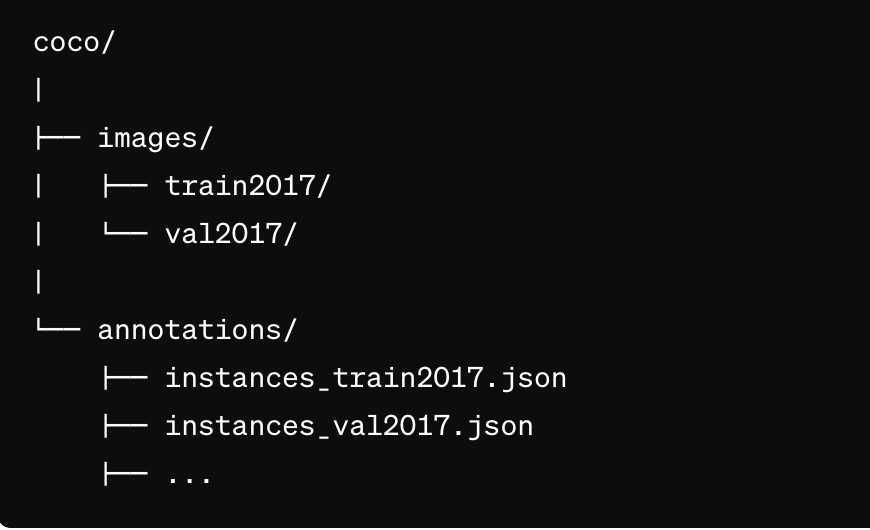


Optionally, after unzipping, you can remove the downloaded .zip files to save space.

In [5]:
! rm coco/images/train2017.zip
! rm coco/images/val2017.zip
! rm coco/annotations/annotations_trainval2017.zip

### Dataset Preparation

Before diving into model building, it's crucial to prepare the dataset. For object detection, loading the images along with their corresponding bounding boxes and class labels.

In [1]:
from torchvision.datasets import CocoDetection
import torchvision.transforms as T

class CustomCocoDetection(CocoDetection):
    def __init__(self, root, annFile, transform=None):
        super(CustomCocoDetection, self).__init__(root, annFile)
        self.transform = transform

    def __getitem__(self, index):
        img, target = super(CustomCocoDetection, self).__getitem__(index)
        # Transform target format from COCO to YOLO (if necessary)
        # Apply transformations to the image
        if self.transform:
            img = self.transform(img)
        return img, target

In [6]:
transform = T.Compose([
    T.Resize((416, 416)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data = CustomCocoDetection(root='./coco/images/train2017',
                                 annFile='./coco/annotations/annotations/instances_train2017.json',
                                 transform=transform)


loading annotations into memory...
Done (t=25.38s)
creating index...
index created!
